
# <span style="color:#0b486b">Exempler Machine Learning Process</span>

The aim of this project is to demonstrate the creation of a simple machine learning pipeline

## <span style="color:#0b486b">Setup + Explore Data</span>

In [2]:
from sklearn import datasets
import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
# this function is a utility to display face images from the dataset
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

In [4]:
from sklearn.datasets import fetch_lfw_people
faces = datasets.fetch_lfw_people(min_faces_per_person=80, resize=0.4)

In [5]:
        # store features in variable X and the label in variable y.
X, y = faces.data, faces.target

In [6]:
 # Identify the target names
class_ids=np.unique(y)

print(f"Number of classes: {len(faces.target_names)}")
    
for i in range(len(class_ids)):
    # [insert your code here]
    print(f'{i} : {faces.target_names[i]}')

Number of classes: 5
0 : Colin Powell
1 : Donald Rumsfeld
2 : George W Bush
3 : Gerhard Schroeder
4 : Tony Blair


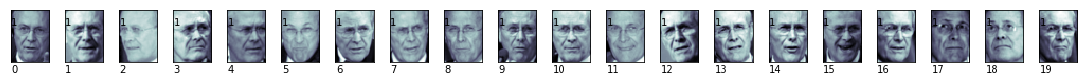

In [7]:
        # Print out the first 20 photos of the first target
    
mask = faces.target == 1
display_faces(faces.images[mask], faces.target[mask], 20)

In [8]:
      # split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=2)

## <span style="color:#0b486b">Pipeline</span>

**Pipeline includes PCA step to reduce dimensionality and uses Logistic Regression**

In [9]:
            # Create Logistic Regression pipeline
from sklearn.pipeline import Pipeline

pca = decomposition.PCA()
logistic = LogisticRegression()
pipe_pca_logistic = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [10]:
            # Run pipeline
pipe_pca_logistic.set_params(pca__n_components=30).fit(X_train, y_train)

y_prediction=pipe_pca_logistic.predict(X_test)

In [11]:
            # Score Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Pipeline performance")
print()

print(f"      Accuracy: {accuracy_score(y_test,y_prediction,)}")
print(f"      Precision: {precision_score(y_test,y_prediction, average='macro')}")
print(f"      Recall: {recall_score(y_test,y_prediction, average='macro')}")
print(f"      F-measure: {f1_score(y_test,y_prediction, average='macro')}\n")

Pipeline performance

      Accuracy: 0.7982456140350878
      Precision: 0.7317906502427671
      Recall: 0.6910978200255936
      F-measure: 0.7077441329745564



10-fold Cross Validation is then performed to improve results

In [12]:
from sklearn.model_selection import cross_validate

            # Performance of K-Fold Cross Validation
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']    
    
scores = cross_validate(pipe_pca_logistic, 
                        X_train, 
                        y_train, 
                        scoring=metrics,
                        cv=10, 
                        return_train_score = False)

scores = {metric: scores[f"test_{metric}"]  for metric in metrics}

[{key: {'Mean': np.mean(score), 'Std': np.std(score)}} for (key, score) in scores.items()]

[{'accuracy': {'Mean': 0.7742756867644951, 'Std': 0.03430898761932144}},
 {'precision_macro': {'Mean': 0.7534384114863991, 'Std': 0.06670456416146037}},
 {'recall_macro': {'Mean': 0.6899489658831763, 'Std': 0.05849176023668471}},
 {'f1_macro': {'Mean': 0.7054345414352782, 'Std': 0.04839134067160793}}]

Choosing Ideal PCA Dimension

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs):
    estimators = []
    seed = 10
    if (pca_dim > 0):
        estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    
    estimators.append((model_name,model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=n_runs, random_state=seed)
    try:
        results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_metrics, verbose=1, n_jobs=-1)
    except ValueError:
        print("Opps! something went wrong!")
        
    return results

10


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished


20


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.6s finished


30


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished


40


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.6s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished


50


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.7s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.8s finished


60


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.5s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.4s finished


70


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.4s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.5s finished


80


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.2s finished


90


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.9s finished


100


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    9.8s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.2s finished


110


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   10.9s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.8s finished


120


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   10.9s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.3s finished


130


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   15.0s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.2s finished


140


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   15.8s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.4s finished


150


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   17.0s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.5s finished


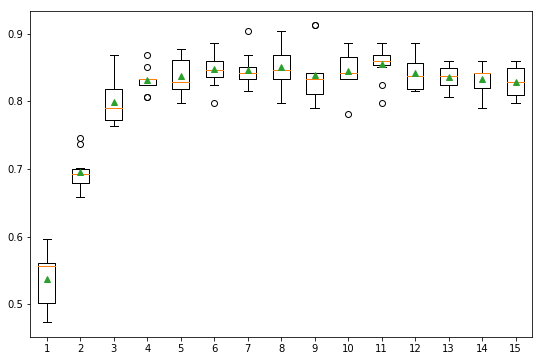

Best PCA number of Dimensions: 110
0.8552631578947368


In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n_runs=10
n_dims=15
step_dim=10
start_dim=10
i=0
accuracies=np.zeros((n_runs,n_dims))

for dim in range(start_dim,start_dim+n_dims*step_dim,step_dim):
    print(dim)
    res = ml_algorithm_screening_face(X,y,LogisticRegression(),"Logistic Regression","accuracy", dim, n_runs)
    accuracies[:,i]=np.array(res)
    i=i+1

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)    
bp = ax.boxplot(accuracies, showmeans=True)
plt.show()

acc_means=accuracies.mean(axis=0)
max_indx=np.argmax(acc_means)
bestDim=start_dim+step_dim*max_indx

print(f"Best PCA number of Dimensions: {bestDim}")
print(acc_means[max_indx])

**Model Selection**

Now that the hyper-parameters have been explored, we can explore to see what Models are most suited to the data.

In [53]:
            # Log Regression
from sklearn.linear_model import LogisticRegression

pipeline_pca_Log = Pipeline([('pca', decomposition.PCA(n_components=bestDim)),
                             ('Log',LogisticRegression())])
pipeline_pca_Log.fit(X_train, y_train)

# Log - Scoring
y_prediction = pipeline_pca_Log.predict(X_test) 

log_rec=recall_score(y_test,y_prediction, average='macro')
log_pre=precision_score(y_test,y_prediction, average='macro')
log_acc=accuracy_score(y_test,y_prediction)
log_f1=f1_score(y_test,y_prediction, average='macro')
# Formatting
print("Model\t\t{}\t\t{}\t\t{}\t\t{}".format('acc','pre','rec','f1'))
print(' ')
print("Log\t\t{:f}\t{:f}\t{:f}\t{:f}".format(log_acc,log_pre,log_rec,log_f1))


Model		acc		pre		rec		f1
 
Log		0.862573	0.820334	0.810749	0.814482


In [68]:
            # LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipeline_pca_LDA = Pipeline([('pca', decomposition.PCA(n_components=bestDim)),
                             ('LDA',LinearDiscriminantAnalysis())])
pipeline_pca_LDA.fit(X_train, y_train)

# LDA - Scoring
y_prediction = pipeline_pca_LDA.predict(X_test) 

LDA_rec=recall_score(y_test,y_prediction, average='macro')
LDA_pre=precision_score(y_test,y_prediction, average='macro')
LDA_acc=accuracy_score(y_test,y_prediction)
LDA_f1=f1_score(y_test,y_prediction, average='macro')
# Formatting
print("Model\t\t{}\t\t{}\t\t{}\t\t{}".format('acc','pre','rec','f1'))
print(' ')
print("LDA\t\t{:f}\t{:f}\t{:f}\t{:f}".format(LDA_acc,LDA_pre,LDA_rec,LDA_f1))

Model		acc		pre		rec		f1
 
LDA		0.877193	0.840301	0.827562	0.833453


In [55]:
            # SVM
from sklearn.svm import SVC
    
pipeline_pca_svm = Pipeline([('pca', decomposition.PCA(n_components=bestDim)),
                             ('svm',SVC())])
pipeline_pca_svm.fit(X_train, y_train)

# SVM - Scoring
y_prediction = pipeline_pca_svm.predict(X_test) 

SVM_rec=recall_score(y_test,y_prediction, average='macro')
SVM_pre=precision_score(y_test,y_prediction, average='macro')
SVM_acc=accuracy_score(y_test,y_prediction)
SVM_f1=f1_score(y_test,y_prediction, average='macro')
# Formatting
print("Model\t\t{}\t\t{}\t\t{}\t\t{}".format('acc','pre','rec','f1'))
print(' ')
print("SVM\t\t{:f}\t{:f}\t{:f}\t{:f}".format(SVM_acc,SVM_pre,SVM_rec,SVM_f1))

Model		acc		pre		rec		f1
 
SVM		0.461988	0.092398	0.200000	0.126400


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
            # Neural Network
from sklearn.neural_network import MLPClassifier           
        
pipeline_pca_neural = Pipeline([('pca', decomposition.PCA(n_components=bestDim)),
                            ('neural',MLPClassifier())])
pipeline_pca_neural.fit(X_train, y_train)

            # Neural Networks Scoring
y_prediction=pipeline_pca_neural.predict(X_test)

NeuNet_rec=recall_score(y_test,y_prediction, average='macro')
NeuNet_pre=precision_score(y_test,y_prediction, average='macro')
NeuNet_acc=accuracy_score(y_test,y_prediction)
NeuNet_f1=f1_score(y_test,y_prediction, average='macro')
print("Neural\t\t{:f}\t{:f}\t{:f}\t{:f}".format(NeuNet_acc,NeuNet_pre,NeuNet_rec,NeuNet_f1))

Neural		0.701754	0.622888	0.631776	0.625247


In [70]:
        # Random Forest
from sklearn.ensemble import RandomForestClassifier    
    
pipeline_pca_forest = Pipeline([('pca', decomposition.PCA(n_components=bestDim)),
                             ('RandForest',RandomForestClassifier())])
pipeline_pca_forest.fit(X_train, y_train)

# KNN - Scoring
y_prediction = pipeline_pca_forest.predict(X_test) 

forest_rec=recall_score(y_test,y_prediction, average='macro')
forest_pre=precision_score(y_test,y_prediction, average='macro')
forest_acc=accuracy_score(y_test,y_prediction)
forest_f1=f1_score(y_test,y_prediction, average='macro')
print("Rand Forest\t\t{:f}\t{:f}\t{:f}\t{:f}".format(forest_acc,forest_pre,forest_rec,forest_f1))

Rand Forest		0.587719	0.486758	0.377711	0.383415


In [58]:
        # KNN

from sklearn.neighbors import KNeighborsClassifier

pipeline_pca_knn = Pipeline([('pca', decomposition.PCA(n_components=bestDim)),
                             ('knn',KNeighborsClassifier())])
pipeline_pca_knn.fit(X_train, y_train)

# KNN - Scoring
y_prediction = pipeline_pca_knn.predict(X_test) 

rec=recall_score(y_test,y_prediction, average='macro')
pre=precision_score(y_test,y_prediction, average='macro')
acc=accuracy_score(y_test,y_prediction)
f1=f1_score(y_test,y_prediction, average='macro')
print("K-NN\t\t\t{:f}\t{:f}\t{:f}\t{:f}".format(acc,pre,rec,f1))

K-NN			0.628655	0.547699	0.453638	0.455950


In [59]:
        # Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

pipeline_pca_gauss = Pipeline([('pca', decomposition.PCA(n_components=bestDim)),
                            ('GaussNB',GaussianNB())])
pipeline_pca_gauss.fit(X_train, y_train)

# GaussianNB Scoring
y_prediction=pipeline_pca_gauss.predict(X_test)

gauss_rec=recall_score(y_test,y_prediction, average='macro')
gauss_pre=precision_score(y_test,y_prediction, average='macro')
gauss_acc=accuracy_score(y_test,y_prediction)
gauss_f1=f1_score(y_test,y_prediction, average='macro')
print("Gaussian NB\t\t{:f}\t{:f}\t{:f}\t{:f}".format(gauss_acc,gauss_pre,gauss_rec,gauss_f1))

Gaussian NB		0.757310	0.817029	0.641244	0.698462


|   |Accuracy   | Precision  | Recall  |F-measure   |
|---|---|---|---|---|
|  Logistic Regression |0.86|0.82|0.81|0.81|
|  LDA |**0.88**|**0.84**|**0.83**|**0.83**|
|  SVM |0.46|0.09|0.20|0.13|
|  Neural Networks |0.70|0.62|0.63|0.63|
|  Random Forest |0.59|0.49|0.38|0.38|
|  K-NN |0.63|0.54|0.45|0.45|
|  GaussianNB |0.76|0.82|0.64|0.70| |

In this case, the Linear Discriminatant Analysis is the most successful classifier. 

_____________________________________________________________________________________________________________________